In [8]:
%pip install pandapower
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [25]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import pandapower as pp
import pandapower.networks
import pandapower.plotting as plot

In [26]:
pp.__version__

'2.9.0'

In [27]:
# use simple example network
net = pandapower.networks.example_simple()

In [28]:
# Read net from json:
net = pp.from_json("./grid.json")

In [29]:
print(net)

This pandapower network includes the following parameter tables:
   - bus (82 elements)
   - load (40 elements)
   - sgen (25 elements)
   - switch (4 elements)
   - ext_grid (4 elements)
   - line (73 elements)
   - trafo (22 elements)
   - line_geodata (73 elements)
   - bus_geodata (82 elements)
 and the following results tables:
   - res_bus (82 elements)
   - res_line (73 elements)
   - res_trafo (22 elements)
   - res_ext_grid (4 elements)
   - res_load (40 elements)
   - res_sgen (25 elements)


In [30]:
net["bus"]

,name,vn_kv,type,zone,in_service
0,110 kV Umspannwerk Blexen/hv_bus_0,110.0,b,None,True
1,"110 kV Überseehafen, Wurster Straße/ov_hv_0",110.0,b,None,True
2,"110 kV Überseehafen, Grauwallring/hv_bus_2",110.0,b,None,True
3,"110 kV Leherheide, Debstedter Weg/hv_bus_3",110.0,b,None,True
4,"110 kV Lehe, Am Wischhacker/hv_bus_4",110.0,b,None,True
...,...,...,...,...,...
77,Fischereihafen - 1/fp_load_2,20.0,n,None,True
78,Fischereihafen - 0/fp_load_1,20.0,n,None,True
79,Fischereihafen MV/fp_load_0,20.0,n,None,True
80,Fischereihafen LV/fp_lv__0,0.4,n,None,True


In [31]:
net["sgen"]

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,min_p_mw,max_p_mw
0,Windpark Speckenbüttel 2,16,2.994865,1.450479,NaN,1.0,True,WP,True,0.0,5.00
1,PV Weddewarden,17,0.000000,0.000000,NaN,1.0,True,PV,True,0.0,0.29
2,PV Lehe - 0,20,0.000000,0.000000,NaN,1.0,True,PV,True,0.0,0.41
3,Windpark Speckenbüttel 1,22,2.994865,1.450479,NaN,1.0,True,WP,True,0.0,5.00
4,Windpark Multibrid,23,2.994865,1.450479,NaN,1.0,True,WP,True,0.0,5.00
5,PV Geestemünde - 0,25,0.000000,0.000000,NaN,1.0,True,PV,True,0.0,0.83
6,PV Lehe - 1,28,0.000000,0.000000,NaN,1.0,True,PV,True,0.0,0.44
7,PV Lehe - 2,30,0.000000,0.000000,NaN,1.0,True,PV,True,0.0,0.49
8,Erdgas Kronos Titan GmbH,32,0.000000,0.000000,NaN,1.0,True,GUD,True,0.0,17.10
9,PV Geestemünde - 1,33,0.000000,0.000000,NaN,1.0,True,PV,True,0.0,0.83


In [32]:
net["load"]

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,Weddewarden Industrielast,15,0.018592,0.009005,0.0,0.0,NaN,1.0,True,wye
1,Weddewarden Households,17,0.097822,0.047377,0.0,0.0,NaN,1.0,True,wye
2,Lehe Industrielast,19,1.207344,0.584743,0.0,0.0,NaN,1.0,True,wye
3,Lehe Households - 0,20,1.255457,0.608046,0.0,0.0,NaN,1.0,True,wye
4,Geestemünde Industrielast,24,1.062595,0.514638,0.0,0.0,NaN,1.0,True,wye
5,Geestemünde Households - 0,25,1.429481,0.692329,0.0,0.0,NaN,1.0,True,wye
6,Lehe Households - 1,28,1.255457,0.608046,0.0,0.0,NaN,1.0,True,wye
7,Lehe Households - 2,30,1.367330,0.662228,0.0,0.0,NaN,1.0,True,wye
8,Erdgas Kronos Titan GmbH,32,0.001015,0.000491,0.0,0.0,NaN,1.0,True,wye
9,Geestemünde Households - 1,33,1.760955,0.852869,0.0,0.0,NaN,1.0,True,wye


In [33]:
net["ext_grid"]

,name,bus,vm_pu,va_degree,slack_weight,in_service
0,Überseehafen,1,1.0,0.0,1.0,True
1,BHV Nord,13,1.0,0.0,1.0,True
2,Lehe,14,1.0,0.0,1.0,True
3,Ext Grid Fischereihafen,8,1.0,0.0,1.0,True


In [34]:
net["line"]

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,243-AL1/39-ST1A 110.0,1,3,9.960,0.1188,0.39,9.0,0.0,0.645,1.0,1,ol,True
1,None,243-AL1/39-ST1A 110.0,5,13,2.000,0.1188,0.39,9.0,0.0,0.645,1.0,1,ol,True
2,None,243-AL1/39-ST1A 110.0,3,4,10.080,0.1188,0.39,9.0,0.0,0.645,1.0,1,ol,True
3,None,243-AL1/39-ST1A 110.0,4,14,2.000,0.1188,0.39,9.0,0.0,0.645,1.0,1,ol,True
4,None,243-AL1/39-ST1A 110.0,4,6,7.670,0.1188,0.39,9.0,0.0,0.645,1.0,1,ol,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,None,None,75,76,1.080,0.0100,0.05,10.0,0.0,0.400,1.0,1,cs,True
69,None,None,76,77,2.275,0.0100,0.05,10.0,0.0,0.400,1.0,1,cs,True
70,None,None,77,78,0.798,0.0100,0.05,10.0,0.0,0.400,1.0,1,cs,True
71,None,None,78,79,0.647,0.0100,0.05,10.0,0.0,0.400,1.0,1,cs,True


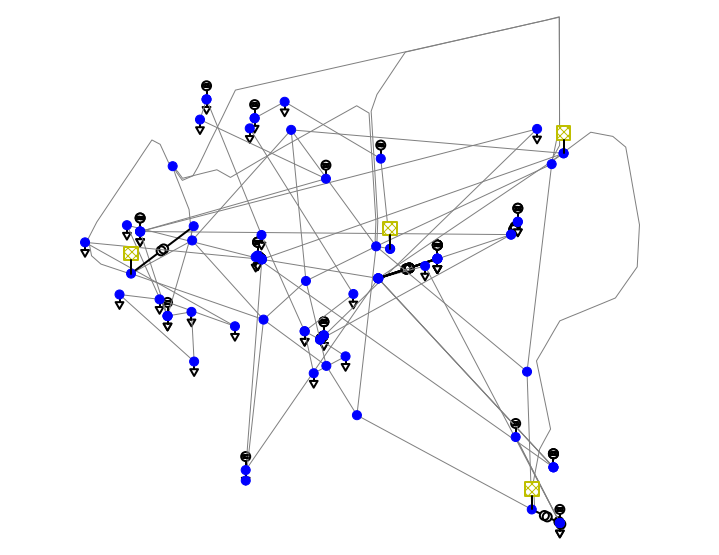

<AxesSubplot:>

In [35]:
plot.simple_plot(
    net,
    plot_loads=True,
    plot_sgens=True,
)

In [36]:
# https://pandapower.readthedocs.io/en/latest/toolbox.html#item-element-selection
pp.get_element_index(net, "load", "Fischereihafen", exact_match=False)

Int64Index([30, 34, 35, 36, 37, 38, 39], dtype='int64')

In [37]:
pp.get_connected_elements_dict(net, buses=8)

{'trafo': [21], 'ext_grid': [3], 'bus': [81, 12, 6, 7], 'line': [16, 6, 14]}

In [38]:
pp.get_connected_buses(
    net, buses=2, respect_switches=True, respect_in_service=False
)

{1, 3, 4}